### Universidad Galileo
### Postgrado en Análisis y Predicción de Datos
### Product Development

#### Denis Alexis Solis Arroyo
#### 20 000 143
#### Tarea 2

#### Importando las librerías 

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### Cargando el dataset
##### Como se puede observar el dataset cuenta con 891 filas y 12 columnas, en este caso, la variable a predecir es si la persona sobrevivió o no, está definido por la columna "Survived", el resto de columnas corresponden a características del pasajero, principalmente del ticket que compró para abordar el barco, siendo estas características que representan el nivel socioeconómico de la persona.

In [30]:
data = pd.read_csv('train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [31]:
data.shape

(891, 12)

##### En este caso se procederá a eliminar 3 columnas, el ID del pasajero, el ID del pasajero, el nombre y el número de ticket, debido a que estas variables son diferentes por cada registro, por lo que no aportarían nada al análisis de los datos

In [32]:
data.drop('PassengerId', axis=1, inplace=True)
data.drop('Name', axis=1, inplace=True)
data.drop('Ticket', axis=1, inplace=True)

data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


### Análisis del target
##### Debido a que se trata de un modelo de clasificación, en este caso solo existen dos posibles resultados, cuando la variable toma el valor de 0, significa que el pasajero no sobrevivió, minetras que si toma el valor de 1 significa que si lo hizo, por lo que en este caso no se debería realizar ninguna transformación sobre esta variable, debido a que son los únicos dos posibles resultados que pueden existir.

##### Al revisar la información se puede observar que la mayoría de personas no sobrevivieron al accidente.

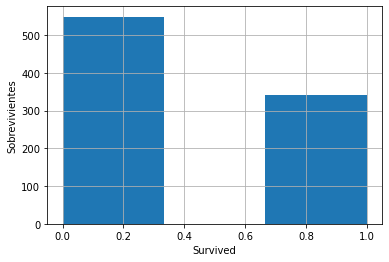

In [33]:
data['Survived'].hist(bins=3, density=False)
plt.xlabel("Survived")
plt.ylabel("Sobrevivientes")
plt.show()

##### Al validar los tipos de datos de las variables del dataset se puede observar que en su mayoría corresponden a columnas numéricas, sin embargo, existen 3 columnas con variables categóricas, siendo estas el sexo de la persona, la cabina donde se encontraba y si fue embarcado o no.

In [34]:
data.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [35]:
cat_vars = [var for var in data.columns if data[var].dtype == 'O']
cat_vars

['Sex', 'Cabin', 'Embarked']

##### La columna cabina será analizada más a fondo, debido a que puede ser un valor único por pasajero, además de contener valores nulos.
##### A continuación se presentan las variables numéricas

In [36]:
#variables numéricas
num_vars = [var for var in data.columns if(var not in cat_vars and var != 'Survived')]
num_vars

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

### Análisis de valores faltantes

##### Como se puede observar, existen 3 variables con valores faltantes, en este caso la edad, cabina y el tipo de embarcamiento, se analizará el % de faltantes para determinar si debe realizarse algún tipo de procesamiento.

In [37]:
var_with_na = [var for var in data.columns if(data[var].isnull().sum() > 0)]
var_with_na

['Age', 'Cabin', 'Embarked']

##### La variable con más datos faltantes es la cabina, se analizara si existe cierta relación con la variable a predecir y los valores faltantes, sin embargo, muy probablmente, se deba deshechar debido a que contiene casi un 80% de valores faltantes.

In [38]:
data[var_with_na].isnull().mean().sort_values(ascending=False)

Cabin       0.771044
Age         0.198653
Embarked    0.002245
dtype: float64

##### Se utilizará la función vista en clase para analizar como afectan los valores nulos contra la variable a predecir, en este caso, hay dos posibles resultados 

In [39]:
def na_impact_over_target(df, Xvar, Yvar):
    df = data.copy()
    df[Xvar] = np.where(df[Xvar].isnull(), 1, 0)
    temp = df.groupby(Xvar)[Yvar].agg(['mean', 'std'])
    temp.plot(kind="barh", y="mean", xerr="std", legend=False, title=Yvar)
    plt.show()

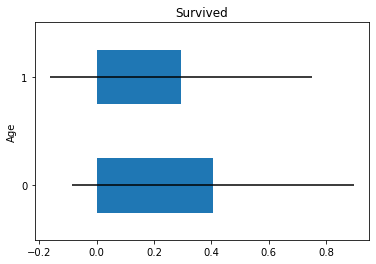

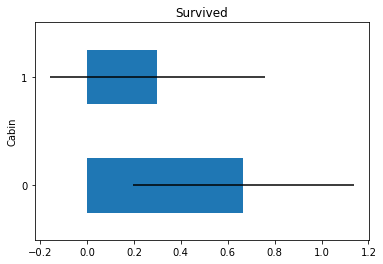

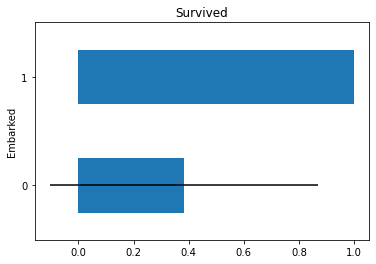

In [40]:
for var in var_with_na:
    na_impact_over_target(data, var, 'Survived')

#### En este caso, por ser una variable categórica el análisis cambia un poco:
##### - Age: Se puede observar que cuando el registro si tiene valores, la barra se acerca más a 1, esto quiere decir que es más probable que la persona haya sobrevivido, esto no quiere decir que con saber la edad, la persona tiene más probabilidad de sobrevivir, sino solo que aquellos registros que si tienen edad, parecen ser los que si sobrevivieron.

##### - Cabin: La variable muestra el tipo de cabina en la que estaba el cliente, al igual que la variable Age, se puede observar que cuando los datos faltan, los valores se acercan menos a 1, por lo que se podría inferir, que el tipo de cabina que un pasajero contrató tiene cierta relación con la supervivencia.

##### - Embarked: Cuando existen valores nulos, se puede observar que la media es igual a 1, es decir que cuando faltan valores todos los pasajeros sobreviven, sin embargo, la variable únicamente muestra un porcentaje 0.002 de faltantes, por lo que se podría decir que es una variable importante y que se debe conservar.


## Análisis de variables temporales

#### No existen variables temporales, ya que el accidente se dió una sola vez y por ende no existen tendencias o fechas relacionadas, las únicas variables que se podrían considerar serían las relacionadas a la edad. 